# <span style='color:blue'>Lab 3</span>
# <span style='color:blue'> <u>Association Rule Mining, Clustering, or Collaborative Filtering </u></span>

## Group Members
- Helene Barrera
- Feby Thomas
- John Olanipekun
- Justin Ehly

## <span style='color:blue'><u> Lab 3 Executive Summary </u></span>


---
## Instructions
In the final assignment for this course, you will be using one of three different analysis methods:
- **Option A:** Use clustering on an unlabeled dataset to provide insight or features
- <span style='color:blue'>**Option B:** Use transaction data for mining associations rules</span>
- **Option C:** Use collaborative filtering to build a custom recommendation system<br><br>
Your choice of dataset will largely determine the task that you are trying to achieve, though the dataset does not need to change from your previous tasks.<br><br>
- For example, you might choose to use clustering on your data as a preprocessing step that extracts different features. Then you can use those features to build a classifier and analyze its performance in terms of accuracy (precision, recall) and speed.
- Alternatively, you might choose a completely different dataset and perform rule mining or build a recommendation system.
---

---
## Dataset Selection and Toolkits
<br>
As before, you need to choose a dataset that is not small. It might be massive in terms of the number of attributes (or transactions), classes (or items, users, etc.) or whatever is appropriate for the task you are performing. Note that scikit-learn can be used for clustering analysis, but not for Association Rule Mining (you should use R) or collaborative filtering (you should use graphlabcreate from Dato). Both can be run using Jupyter notebooks as shown in lecture.<br><br>
- One example of a recommendation dataset is the movie lens rating data: http://grouplens.org/ datasets/movielens/  
<br>
- Some examples of association rule mining datasets: http://fimi.ua.ac.be/data/ <br>
<br>
Write a report covering in detail all the steps of the project. The results need to be reproducible using only this report. <br>
Describe all assumptions you make and include all code you use in the Jupyter notebook or as supplemental functions. 
<br><br>
<b>Follow the CRISP-DM framework in your analysis (you are performing all of the CRISP-DM outline).</b>
<br><br>
<span style='color:red'> <b><u>This report is worth 20% of the final grade.</u></b>  </span>
<br>

---

---
## Business Understanding [10 points]
###### <span style='color:blue'>1. Describe the purpose of the data set you selected (i.e., why was this data collected in the first place?).</span> 

---

We chose to use the MovieLens Small data set, officially called ML-Latest-small data set from GroupLens in order to gain experience working with transaction data and association rules mining. The dataset consists of 4 different comma separated files containing links, movies, ratings and tags. The links file contains unique ID's for each movie (movieId) in the dataset as well as each movie's corresponding IMDB (imdbId) unique ID and themoviedb.org unique ID (tmdbId).
* 100k movie ratings
* 3,600 tags
* 9,000 movies (titles)
* 600 users (by userId only)

Citations:
F. Maxwell Harper and Joseph A. Konstan. 2015. The MovieLens Datasets: History and Context. ACM Transactions on Interactive Intelligent Systems (TiiS) 5, 4: 19:1–19:19. https://doi.org/10.1145/2827872

TMDB API Documentation:  
https://www.themoviedb.org/documentation/api/wrappers-libraries  
Python Library: https://github.com/celiao/tmdbsimple/    

IMDB API Documentation:
https://developer.imdb.com/documentation  

------
MoveLens Permission:<br>
Hello!

Thank you for completing the form to request dataset usage. You have been approved to use the datasets as you have described in this form (educational or academic research, NON COMMERCIAL USE). Should any usage details change, you will need to fill out the form again. You have requested to redistribute a small amount of data for your project, which has been approved for the <b>ML-Latest-small data set only</b>. Please notify us of any publications that result from this usage, and follow the guidelines laid out for usage in the associated readme file.

As described in the README file, please acknowledge your use of MovieLens Datasets in any publication or demonstration by citing this paper: F. Maxwell Harper and Joseph A. Konstan. 2015. The MovieLens Datasets: History and Context. ACM Transactions on Interactive Intelligent Systems (TiiS) 5, 4: 19:1–19:19. https://doi.org/10.1145/2827872  

Please note:
On updated chrome browsers we use a secure URL for grouplens.org (https://grouplens.org) but we link to insecure access for the files (http://files.grouplens.org) and apparently chrome has decided to just ignore such clicks. Until we can fix this issue, when you click the dataset links at grouplens.org you may see a privacy error indicating that something is wrong and you shouldn't do whatever you were doing, or it may just show up as a broken link or 404 Error. 
The best workaround is to download your requested dataset through this link: <http://files.grouplens.org/datasets/movielens/> It's the same link that you find on our MovieLens Dataset page, but pointing the "insecure" version of the site because the secure version is broken. This issue is being worked on right now.

Have a great week, and happy researching!

~Laura

-- 

-----

NOTE: The University of Minnesota began working remotely on March 18th, 2020, and will do so for the indefinite future. To that end, email is the best way to contact me at this time. 

------
Assistant to Professors Stevie Chancellor, Joe Konstan, Loren Terveen, & Lana Yarosh
Administrator GroupLens Research Lab
University of Minnesota, Department of Computer Science & Engineering
200 Union Street SE, 4-192 Keller Hall
Minneapolis, MN  55455
(612)626-2057
http://grouplens.org/
https://twitter.com/grouplens

I acknowledge that the University of Minnesota stands on Miní Sóta Makhóčhe, the homelands of the Dakhóta Oyáte



###### <span style='color:blue'>2. How will you measure the effectiveness of a good algorithm? </span>
--

Ways to measure association rules mining are using Support, Confidence, Lift, Interest <b>--> we need to have a group chat about which one or ones we should focus on.</b>

###### <span style='color:blue'>3. Why does your chosen validation method make sense for this specific dataset and the stakeholders needs?</span>
--

---
## Data Understanding [20 points total]
### <span style='color:blue'>Data Wrangling [10 points]</span>
<b>Questions are answered further down after the wranling is complete and the dataset is shaped</b>

---

In [1]:
import pandas as pd
import numpy as np
import os
import time
import matplotlib as mp
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import copy
%matplotlib inline
# from ICA 5
from IPython.core.display import HTML
HTML("<link href='https://fonts.googleapis.com/css?family=Passion+One' rel='stylesheet' type='text/css'><style>div.attn { font-family: 'Helvetica Neue'; font-size: 30px; line-height: 40px; color: #FFFFFF; text-align: center; margin: 30px 0; border-width: 10px 0; border-style: solid; border-color: #5AAAAA; padding: 30px 0; background-color: #DDDDFF; }hr { border: 0; background-color: #ffffff; border-top: 1px solid black; }hr.major { border-top: 10px solid #5AAA5A; }hr.minor { border: none; background-color: #ffffff; border-top: 5px dotted #CC3333; }div.bubble { width: 65%; padding: 20px; background: #DDDDDD; border-radius: 15px; margin: 0 auto; font-style: italic; color: #f00; }em { color: #AAA; }div.c1{visibility:hidden;margin:0;height:0;}div.note{color:red;}</style>")

# points to location of my R libraries
lib_loc = 'C:/Users/justi/.conda/pkgs/rpy2-3.4.4-py38r36h10235a5_0/R/win-library/4.1'

os.chdir('C:/Users/justi/GitHub/Lab 3/data')  #windows
#os.chdir('/mnt/c/Users/justi/GitHub/Lab 3/data') #ubuntu

In [2]:
# let's get some data!
ratings = pd.read_csv('ratings.csv')
items = pd.read_csv('movies.csv')
tags = pd.read_csv('tags.csv')
links = pd.read_csv('links.csv')

#print out our data
print('\n- - - - - Ratings- - - - - \n')
print(ratings.head())
print(ratings.info())
print('\n- - - - - Items- - - - - - \n')
print(items.head())
print(items.info())
print('\n- - - - - Tags- - - - - - -\n')
print(tags.head())
print(tags.info())
print('\n- - - - - Links- - - - - - \n')
print(links.head())
print(links.info())


- - - - - Ratings- - - - - 

   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB
None

- - - - - Items- - - - - - 

   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   



In [3]:
#how many genres does each movie have associated with it (keep in mind the ones missing a genre count as 1)
movgenres = items.genres.str.count('\|')+1
movgenres.value_counts()

2     3218
1     2851
3     2338
4      987
5      271
6       63
7       12
8        1
10       1
Name: genres, dtype: int64

---
---

##### <span style='color:blue'>Explore missing values</span>
###### ---------------items.csv---------------
---

In [4]:
# make a dataframe of missing genres and their corresponding tmdbId's so we can try to find their genres
idx = items[items.genres.str.contains('no genres')].index
idx
missing = items.iloc[idx,:]
missing = missing.merge(links, on='movieId', how='left')
print('Missing Data: %d records are missing genre from the items.csv file' % missing.movieId.count())

# go ahead and drop those values from the items dataset because it is easier to add them back in later
items.drop(index=idx,inplace=True)

Missing Data: 34 records are missing genre from the items.csv file


In [5]:
missing.head()

,movieId,title,genres,imdbId,tmdbId
0,114335,La cravate (1957),(no genres listed),121731,32891.0
1,122888,Ben-hur (2016),(no genres listed),2638144,271969.0
2,122896,Pirates of the Caribbean: Dead Men Tell No Tal...,(no genres listed),1790809,166426.0
3,129250,Superfast! (2015),(no genres listed),2933474,325358.0
4,132084,Let It Be Me (1995),(no genres listed),113638,335145.0


In [6]:
items.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [7]:
# log into tmdb to pull the missing genres
# communicate with the movie database and pull all crew information for each movie in the links df
# if there's no match to the provided tmdbId then just assign the list position to 0 so we can deal with it later


# set up the the movie database library and API key
import tmdbsimple as tmdb
tmdb.API_KEY = '19f654e762815e69826afb4f2939d599'

# grab what data is available from the tmdb server 
from progressbar import ProgressBar
pbar = ProgressBar()
tm = []
for i in pbar(range(len(missing))):
    try: 
        tm.append(tmdb.Movies(missing.tmdbId[i]))
    except:
        tm.append(0)

# pull just the tmdbId's and genre information out of the downloaded list of dictionaries
# also print so we know how 
replace_miss_values = []
count = 0
for x in range(len(tm)):
    try:
        replace_miss_values.append({k: v for k,v in tm[x].info().items() if k in ['id','genres']})
    except: 
        count +=1
print('There were %d missing tmdbId\'s returned'% count)

tm_dic = [{k: v for k,v in replace_miss_values[i].items()} for i in range(len(replace_miss_values))]
#print(tm_dic)

100% |########################################################################|


There were 7 missing tmdbId's returned


In [8]:
# overall goal make a new df to fill in some of the missing genre values
ids = []
mgs = []

for i in range(len(tm_dic)):
    for r in range(len(tm_dic[i]['genres'])):
                   ids.append(tm_dic[i]['id'])
                   mgs.append(tm_dic[i]['genres'][r]['name'])
                   
miss_gens = pd.DataFrame({'tmdbId': ids,
                        'genres':mgs})

miss_gens.head()

# see if we picked up any new genres - if so we will drop them to keep the dataset as intact as possible
new_genres = pd.Series(miss_gens.genres.unique())

# list of the unique values from items.genres
given = pd.DataFrame(items.genres.str.split('\|', expand=True)) 
sets = given[0]
for s in range(1,9):
    sets = sets.append(given[s])
given = pd.Series(sets.unique())
#sorted(given)
#sorted(missing)


del given[19]
given[18] = 'no genre'
given.sort_values(inplace=True, ignore_index=True)
new_genres.sort_values(inplace=True, ignore_index=True)
#print(given,'\n', new_genres)                   


In [9]:
# need to add the movieIds back into the miss_gens df, drop the other id's
miss_gens = miss_gens.merge(links, on='tmdbId', how='left')
miss_gens.drop(columns = ['tmdbId', 'imdbId'], inplace=True)
miss_gens.head()

,genres,movieId
0,Fantasy,114335
1,Action,122888
2,History,122888
3,Adventure,122888
4,Drama,122888


In [10]:
# now we need to make miss_gens match items genres formatting

df = copy.deepcopy(miss_gens)
ids = df.movieId.ne(df.movieId.shift()).cumsum()  # blocks of rows that share the same movieId
df = df.groupby(ids, as_index=False).agg({'movieId': 'first', 'genres': '|'.join}) # group by tmdbId and combine the directors
print(df.isna().value_counts()) # check for missing values
print(df.head()) #preview the grouped df
miss_gens = df

movieId  genres
False    False     27
dtype: int64
   movieId                          genres
0   114335                         Fantasy
1   122888  Action|History|Adventure|Drama
2   122896        Adventure|Action|Fantasy
3   129250                   Action|Comedy
4   132084                         Romance


In [11]:
# Replace missing values in items df
missing.drop(columns=['genres','imdbId','tmdbId'],inplace=True)
missing = missing.merge(miss_gens, on='movieId', how='left')
missing

,movieId,title,genres
0,114335,La cravate (1957),Fantasy
1,122888,Ben-hur (2016),Action|History|Adventure|Drama
2,122896,Pirates of the Caribbean: Dead Men Tell No Tal...,Adventure|Action|Fantasy
3,129250,Superfast! (2015),Action|Comedy
4,132084,Let It Be Me (1995),Romance
5,134861,Trevor Noah: African American (2013),Comedy
6,141131,Guardians (2016),Action|Fantasy|Science Fiction
7,141866,Green Room (2015),Horror|Crime|Thriller
8,142456,The Brand New Testament (2015),Drama|Comedy|Fantasy
9,143410,Hyena Road,War|Drama|Thriller


In [12]:
# add the missing genres and movie titles back into the items df
items = items.append(missing, ignore_index=True)

In [13]:
items[items.genres.isna()==True]

,movieId,title,genres
9718,147250,The Adventures of Sherlock Holmes and Doctor W...,NaN
9728,167570,The OA,NaN
9730,171495,Cosmos,NaN
9732,171749,Death Note: Desu nôto (2006–2007),NaN
9734,172497,T2 3-D: Battle Across Time (1996),NaN
9736,173535,The Adventures of Sherlock Holmes and Doctor W...,NaN
9737,174403,The Putin Interviews (2017),NaN


In [14]:
# we are still left with 7 movies that have no genres, we will drop those
idx = items[items.genres.isna()==True].index
items.drop(index=idx,inplace=True)
items.reset_index(inplace=True,drop=True)
items[items.genres.isna()==True]

,movieId,title,genres


In [15]:
items

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9730,172591,The Godfather Trilogy: 1972-1990 (1992),Crime|Drama
9731,176601,Black Mirror,Drama
9732,181413,Too Funny to Fail: The Life and Death of The D...,Documentary|Comedy
9733,181719,Serving in Silence: The Margarethe Cammermeyer...,Drama|TV Movie



##### some notes
* Music and Musical will merge since the binary split is done using the first the
* letters of the genre anyhow
* TV Movie, nothing is coming up


In [16]:
items.title = items.title.str.rstrip()
year = items.title.str.slice(start=-5, stop=-1)
no_year_idx = year[year.str.isdigit()==False].index
no_year_idx


Int64Index([6059, 9025, 9167, 9349, 9717, 9721, 9728, 9729, 9731], dtype='int64')

In [17]:
items.loc[6059]

movieId        40697
title      Babylon 5
genres        Sci-Fi
Name: 6059, dtype: object

In [18]:
# break apart the movie title and release year
items.title = items.title.str.rstrip()  # remove any trailing spaces
removed = [pd.DataFrame()] # set these aside in case we have time to go back and impute the years, but there are only 13 of them
for i in range(len(no_year_idx)):
    removed.append(items.loc[no_year_idx[i]])
items.drop(index=no_year_idx, inplace=True) # remove titles without a year

items['release_year'] = items.title.str.slice(start=-5, stop=-1)
items.title = items.title.str.slice(stop = -7)





###### ------Ratings------

In [19]:
# let's see if we are missing any ratings informatio
print(ratings[ratings.isna() == True].value_counts())


Series([], dtype: int64)


###### ------Tags------

In [20]:
tags.isna().value_counts()

userId  movieId  tag    timestamp
False   False    False  False        3683
dtype: int64

###### ------Links------

In [21]:
links.isna().value_counts()

movieId  imdbId  tmdbId
False    False   False     9734
                 True         8
dtype: int64

In [22]:
idx = links[links.tmdbId.isna() == True].index # we will keep this mind when use the movie db to impute missing values
links.drop(index=idx, inplace=True)
links[links.tmdbId.isna() == True]

,movieId,imdbId,tmdbId


---
##### Create binary matrix for the genres
We will follow the zoo example from week 12's codebook

---

In [23]:
# create a binary matrix for the genres (this follows along the zoo examples from week 12)
genres = pd.DataFrame(items.genres.str.split('\|', expand=True)) # parse the pipe separated values
gens = genres.copy()
genres = pd.get_dummies(genres)
#print(genres.head(2))

# get a list of the genres names to help with recombining them after the dummies are made
gens = pd.DataFrame(gens.stack())
gens.reset_index(inplace=True, drop=True)
gens = gens.iloc[:,0].unique()

# rename and rearrange the columns in genres df
# rename columns
genres_columns = []
for i in range(len(genres.columns)):
    word=pd.Series(genres.columns[i])
    word = word.str.slice(start=2)+word.str.slice(stop=1)
    genres_columns.append(word)

genres_columns = pd.DataFrame(genres_columns) # convert pd.Series to pd.DataFrame
genres.columns = [genres_columns.iloc[:,0]] # rename the genres df columns using genres_columns df[0]

# alphabetically sort columns in genres df 
genres_cols = [genres_columns.iloc[:,0].sort_values(axis=0)] # sort the column names in the genres_column df, return as a list
genres = genres.reindex(columns = genres_cols) # reorder columns in the genres df based on the order from the genres_column

In [24]:
# combine similar columns
# check to make sure we can use the 1st 3 letters of each genre for grouping 
temp = []
for i in gens:
    temp.append(i[0:3])
    
temp = pd.DataFrame(temp)
temp = [temp.iloc[:,0].sort_values(axis=0)]
#print(temp)

# confirmed, now we apply this same logic to the genres.columns for grouping and sum
group = []
for i in genres_cols[0]:
    x=0
    group.append(i[0:3])
    x+=1
print(group)

['Act', 'Act', 'Adv', 'Adv', 'Adv', 'Ani', 'Ani', 'Ani', 'Chi', 'Chi', 'Chi', 'Chi', 'Com', 'Com', 'Com', 'Com', 'Com', 'Cri', 'Cri', 'Cri', 'Cri', 'Cri', 'Doc', 'Doc', 'Doc', 'Doc', 'Dra', 'Dra', 'Dra', 'Dra', 'Dra', 'Fam', 'Fan', 'Fan', 'Fan', 'Fan', 'Fan', 'Fan', 'Fil', 'Fil', 'Fil', 'Fil', 'Fil', 'Fil', 'His', 'Hor', 'Hor', 'Hor', 'Hor', 'Hor', 'Hor', 'IMA', 'IMA', 'IMA', 'IMA', 'IMA', 'IMA', 'Mus', 'Mus', 'Mus', 'Mus', 'Mus', 'Mus', 'Mus', 'Mus', 'Mys', 'Mys', 'Mys', 'Mys', 'Mys', 'Mys', 'Mys', 'Mys', 'Rom', 'Rom', 'Rom', 'Rom', 'Rom', 'Rom', 'Rom', 'Sci', 'Sci', 'Sci', 'Sci', 'Sci', 'Sci', 'Sci', 'Sci', 'Sci', 'TV ', 'TV ', 'TV ', 'Thr', 'Thr', 'Thr', 'Thr', 'Thr', 'Thr', 'Thr', 'Thr', 'Thr', 'War', 'War', 'War', 'War', 'War', 'War', 'Wes', 'Wes', 'Wes', 'Wes', 'Wes', 'Wes', 'Wes']


In [25]:
# group columns using first 3 letters of each name
genres = genres.groupby([group], axis=1).sum() # group columns to get back to 20 columns

gens = sorted(gens) #sort the names alpha
gens.remove('Musical')
gens.remove('Science Fiction')

# use dictionary comprehension to make dict of {old: new} names
new_cols = {genres.columns[i]: gens[i] for i in range(len(gens))} 
new_cols

# rename columns
genres.rename(columns = new_cols, inplace=True)
genres.head()

,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,Horror,IMAX,Music,Mystery,Romance,Sci-Fi,TV Movie,Thriller,War,Western
0,0,1,1,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
genres

,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,Horror,IMAX,Music,Mystery,Romance,Sci-Fi,TV Movie,Thriller,War,Western
0,0,1,1,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9727,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
9730,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9732,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9733,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [27]:
len(group)


114

In [28]:
# sanity check
print(genres)
print(items.genres)

      Action  Adventure  Animation  Children  Comedy  Crime  Documentary  \
0          0          1          1         1       1      0            0   
1          0          1          0         1       0      0            0   
2          0          0          0         0       1      0            0   
3          0          0          0         0       1      0            0   
4          0          0          0         0       1      0            0   
...      ...        ...        ...       ...     ...    ...          ...   
9727       0          0          0         0       0      0            0   
9730       0          0          0         0       0      1            0   
9732       0          0          0         0       1      0            1   
9733       0          0          0         0       0      0            0   
9734       0          0          0         0       0      0            0   

      Drama  Family  Fantasy  ...  Horror  IMAX  Music  Mystery  Romance  \
0         0

In [29]:
print(items[items.movieId == 2571])
genres.iloc[1939,:]

      movieId        title                  genres release_year
1939     2571  Matrix, The  Action|Sci-Fi|Thriller         1999


Action         1
Adventure      0
Animation      0
Children       0
Comedy         0
Crime          0
Documentary    0
Drama          0
Family         0
Fantasy        0
Film-Noir      0
History        0
Horror         0
IMAX           0
Music          0
Mystery        0
Romance        0
Sci-Fi         1
TV Movie       0
Thriller       1
War            0
Western        0
Name: 1939, dtype: uint8

In [30]:
# merge items and genres back together
items = items.join(genres)
items

,movieId,title,genres,release_year,Action,Adventure,Animation,Children,Comedy,Crime,...,Horror,IMAX,Music,Mystery,Romance,Sci-Fi,TV Movie,Thriller,War,Western
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji,Adventure|Children|Fantasy,1995,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men,Comedy|Romance,1995,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
3,4,Waiting to Exhale,Comedy|Drama|Romance,1995,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,5,Father of the Bride Part II,Comedy,1995,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9727,169034,Lemonade,Music|TV Movie,2016,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
9730,172591,The Godfather Trilogy: 1972-1990,Crime|Drama,1992,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9732,181413,Too Funny to Fail: The Life and Death of The D...,Documentary|Comedy,2017,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9733,181719,Serving in Silence: The Margarethe Cammermeyer...,Drama|TV Movie,1995,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [31]:
# now that we spot checked that the genres are matching the binaries
items.drop(columns=['genres'], inplace=True) 
items

,movieId,title,release_year,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Horror,IMAX,Music,Mystery,Romance,Sci-Fi,TV Movie,Thriller,War,Western
0,1,Toy Story,1995,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji,1995,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men,1995,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,4,Waiting to Exhale,1995,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,5,Father of the Bride Part II,1995,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9727,169034,Lemonade,2016,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
9730,172591,The Godfather Trilogy: 1972-1990,1992,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9732,181413,Too Funny to Fail: The Life and Death of The D...,2017,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
9733,181719,Serving in Silence: The Margarethe Cammermeyer...,1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


---
---

##### Build the Dataset
---

In [32]:
# change the tags to binary since we aren't performing any nlp analysis on the tags directly
tags.tag = 1 # convert tas to binary

In [33]:
import copy
# build the dataset!
movies = ratings.merge(tags, on=['userId', 'movieId'], how="left")
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102677 entries, 0 to 102676
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   userId       102677 non-null  int64  
 1   movieId      102677 non-null  int64  
 2   rating       102677 non-null  float64
 3   timestamp_x  102677 non-null  int64  
 4   tag          3476 non-null    float64
 5   timestamp_y  3476 non-null    float64
dtypes: float64(3), int64(3)
memory usage: 5.5 MB


In [34]:
movies = movies.merge(items, on='movieId', how='left')
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102677 entries, 0 to 102676
Data columns (total 30 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   userId        102677 non-null  int64  
 1   movieId       102677 non-null  int64  
 2   rating        102677 non-null  float64
 3   timestamp_x   102677 non-null  int64  
 4   tag           3476 non-null    float64
 5   timestamp_y   3476 non-null    float64
 6   title         102654 non-null  object 
 7   release_year  102654 non-null  object 
 8   Action        102654 non-null  float64
 9   Adventure     102654 non-null  float64
 10  Animation     102654 non-null  float64
 11  Children      102654 non-null  float64
 12  Comedy        102654 non-null  float64
 13  Crime         102654 non-null  float64
 14  Documentary   102654 non-null  float64
 15  Drama         102654 non-null  float64
 16  Family        102654 non-null  float64
 17  Fantasy       102654 non-null  float64
 18  Film

In [35]:
movies.head(10)

,userId,movieId,rating,timestamp_x,tag,timestamp_y,title,release_year,Action,Adventure,...,Horror,IMAX,Music,Mystery,Romance,Sci-Fi,TV Movie,Thriller,War,Western
0,1,1,4.0,964982703,NaN,NaN,Toy Story,1995,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,3,4.0,964981247,NaN,NaN,Grumpier Old Men,1995,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1,6,4.0,964982224,NaN,NaN,Heat,1995,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1,47,5.0,964983815,NaN,NaN,Seven (a.k.a. Se7en),1995,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1,50,5.0,964982931,NaN,NaN,"Usual Suspects, The",1995,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5,1,70,3.0,964982400,NaN,NaN,From Dusk Till Dawn,1996,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,1,101,5.0,964980868,NaN,NaN,Bottle Rocket,1996,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7,1,110,4.0,964982176,NaN,NaN,Braveheart,1995,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8,1,151,5.0,964984041,NaN,NaN,Rob Roy,1995,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
9,1,157,5.0,964984100,NaN,NaN,Canadian Bacon,1995,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [36]:
movies.rename(columns={"timestamp_x":"rating_timestamp", "timestamp_y":"tag_timestamp"}, inplace = True)
#movies.head()

In [37]:
# replace NaN tag values with "no tag" as opposed to 0 because it is a meaningful value that is easy to intperpret
values = {"tag":0, "tag_timestamp":0}
movies.fillna(value = values, inplace=True)
#movies.info()

In [38]:
# change timestamps to integers for manipulation
movies.tag_timestamp = movies.tag_timestamp.astype("int64")

# let's convert those timestamps!
import datetime as dt

movies.rating_timestamp = pd.to_datetime([dt.datetime.utcfromtimestamp(x) for x in movies.rating_timestamp])
movies.tag_timestamp = pd.to_datetime([dt.datetime.utcfromtimestamp(x) for x in movies.tag_timestamp])


In [39]:
# breakout years, months, days, hours
movies['rating_year'] = movies['rating_timestamp'].dt.year
movies['rating_month'] = movies['rating_timestamp'].dt.month_name()
movies['rating_day'] = movies['rating_timestamp'].dt.day_name()
movies['rating_hour'] = movies['rating_timestamp'].dt.hour

movies['tag_year'] = movies['tag_timestamp'].dt.year
movies['tag_month'] = movies['tag_timestamp'].dt.month_name()
movies['tag_day'] = movies['tag_timestamp'].dt.day_name()
movies['tag_hour'] = movies['tag_timestamp'].dt.hour




In [40]:
# change Id's into categorical dtypes

# remove NaN tmdbId rows from the movies df
inds = movies[movies.isna().any(axis=1)].index.to_list()
movies.drop(index=inds,inplace=True)

# change all cat attrs to categorical
cat_features = ['userId', 'movieId', 'rating_year',
       'rating_month', 'rating_day', 'rating_hour', 'tag_year', 'tag_month',
       'tag_day', 'tag_hour', 'release_year']
movies[cat_features] = movies.copy()[cat_features].astype("category")


In [41]:
movies.head(5)

,userId,movieId,rating,rating_timestamp,tag,tag_timestamp,title,release_year,Action,Adventure,...,War,Western,rating_year,rating_month,rating_day,rating_hour,tag_year,tag_month,tag_day,tag_hour
0,1,1,4.0,2000-07-30 18:45:03,0.0,1970-01-01,Toy Story,1995,0.0,1.0,...,0.0,0.0,2000,July,Sunday,18,1970,January,Thursday,0
1,1,3,4.0,2000-07-30 18:20:47,0.0,1970-01-01,Grumpier Old Men,1995,0.0,0.0,...,0.0,0.0,2000,July,Sunday,18,1970,January,Thursday,0
2,1,6,4.0,2000-07-30 18:37:04,0.0,1970-01-01,Heat,1995,1.0,0.0,...,0.0,0.0,2000,July,Sunday,18,1970,January,Thursday,0
3,1,47,5.0,2000-07-30 19:03:35,0.0,1970-01-01,Seven (a.k.a. Se7en),1995,0.0,0.0,...,0.0,0.0,2000,July,Sunday,19,1970,January,Thursday,0
4,1,50,5.0,2000-07-30 18:48:51,0.0,1970-01-01,"Usual Suspects, The",1995,0.0,0.0,...,0.0,0.0,2000,July,Sunday,18,1970,January,Thursday,0


In [42]:
movies[movies.duplicated()]

,userId,movieId,rating,rating_timestamp,tag,tag_timestamp,title,release_year,Action,Adventure,...,War,Western,rating_year,rating_month,rating_day,rating_hour,tag_year,tag_month,tag_day,tag_hour
8865,62,2023,5.0,2018-05-06 19:58:45,1.0,2018-05-06 19:59:12,"Godfather: Part III, The",1990,0.0,0.0,...,0.0,0.0,2018,May,Sunday,19,2018,May,Sunday,19
15909,103,296,5.0,2015-05-18 13:07:19,1.0,2015-05-18 13:09:15,Pulp Fiction,1994,0.0,0.0,...,0.0,0.0,2015,May,Monday,13,2015,May,Monday,13
15910,103,296,5.0,2015-05-18 13:07:19,1.0,2015-05-18 13:09:15,Pulp Fiction,1994,0.0,0.0,...,0.0,0.0,2015,May,Monday,13,2015,May,Monday,13
19009,119,101142,4.0,2015-07-04 20:40:20,1.0,2015-07-10 21:17:47,"Croods, The",2013,0.0,1.0,...,0.0,0.0,2015,July,Saturday,20,2015,July,Friday,21
19010,119,101142,4.0,2015-07-04 20:40:20,1.0,2015-07-10 21:17:47,"Croods, The",2013,0.0,1.0,...,0.0,0.0,2015,July,Saturday,20,2015,July,Friday,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84662,533,356,5.0,2015-02-24 04:54:34,1.0,2015-02-24 04:57:46,Forrest Gump,1994,0.0,0.0,...,1.0,0.0,2015,February,Tuesday,4,2015,February,Tuesday,4
90351,573,5254,4.5,2007-08-08 16:07:10,1.0,2007-08-08 16:05:25,Blade II,2002,1.0,0.0,...,0.0,0.0,2007,August,Wednesday,16,2007,August,Wednesday,16
90404,573,35836,5.0,2007-08-08 16:19:53,1.0,2007-08-08 16:05:05,"40-Year-Old Virgin, The",2005,0.0,0.0,...,0.0,0.0,2007,August,Wednesday,16,2007,August,Wednesday,16
90405,573,35836,5.0,2007-08-08 16:19:53,1.0,2007-08-08 16:05:05,"40-Year-Old Virgin, The",2005,0.0,0.0,...,0.0,0.0,2007,August,Wednesday,16,2007,August,Wednesday,16


In [43]:
movies.drop_duplicates(inplace=True, ignore_index=True)
movies[movies.duplicated()]

,userId,movieId,rating,rating_timestamp,tag,tag_timestamp,title,release_year,Action,Adventure,...,War,Western,rating_year,rating_month,rating_day,rating_hour,tag_year,tag_month,tag_day,tag_hour


In [44]:
# remove timestamp columns since we extracted what may be the most relevant data from them
# also remove the movieId since have the title
movies.drop(columns=['movieId','rating_timestamp','tag_timestamp'], inplace=True) # since we imputed all genres and dropped movies without one

movies.head()

,userId,rating,tag,title,release_year,Action,Adventure,Animation,Children,Comedy,...,War,Western,rating_year,rating_month,rating_day,rating_hour,tag_year,tag_month,tag_day,tag_hour
0,1,4.0,0.0,Toy Story,1995,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,2000,July,Sunday,18,1970,January,Thursday,0
1,1,4.0,0.0,Grumpier Old Men,1995,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,2000,July,Sunday,18,1970,January,Thursday,0
2,1,4.0,0.0,Heat,1995,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2000,July,Sunday,18,1970,January,Thursday,0
3,1,5.0,0.0,Seven (a.k.a. Se7en),1995,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2000,July,Sunday,19,1970,January,Thursday,0
4,1,5.0,0.0,"Usual Suspects, The",1995,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2000,July,Sunday,18,1970,January,Thursday,0


In [45]:
movies.release_year.value_counts()

1995    6181
1994    5519
1999    4626
1996    4524
2000    4323
        ... 
1903       2
1919       1
1917       1
1915       1
1908       1
Name: release_year, Length: 106, dtype: int64

In [46]:
movies.tag_year.value_counts()

1970    99181
2006     1221
2018      840
2017      329
2016      305
2009      152
2015      146
2010      132
2012       47
2007       22
2008        9
2013        8
2011        7
2014        4
Name: tag_year, dtype: int64

In [47]:
movies.rating_year.value_counts()

2000    10063
2017     8516
2007     7118
2018     7052
2016     6915
2015     6719
1996     6040
2005     5814
2012     4690
2008     4446
2009     4209
2006     4076
2003     4025
2001     3933
2002     3479
2004     3289
1999     2439
2010     2356
1997     1916
2011     1694
2013     1669
2014     1438
1998      507
Name: rating_year, dtype: int64

Note that 1970 is the year set for movies that did not have tags. We may want to consider converting this column to binary and not worrying about that actual language used in the tag

### <span style='color:blue'>Section 1: Data Meaning [10 points]</span>
1. Describe the meaning and type of data (scale, values, etc.) for each attribute in the data file. 


In [48]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102403 entries, 0 to 102402
Data columns (total 35 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   userId        102403 non-null  category
 1   rating        102403 non-null  float64 
 2   tag           102403 non-null  float64 
 3   title         102403 non-null  object  
 4   release_year  102403 non-null  category
 5   Action        102403 non-null  float64 
 6   Adventure     102403 non-null  float64 
 7   Animation     102403 non-null  float64 
 8   Children      102403 non-null  float64 
 9   Comedy        102403 non-null  float64 
 10  Crime         102403 non-null  float64 
 11  Documentary   102403 non-null  float64 
 12  Drama         102403 non-null  float64 
 13  Family        102403 non-null  float64 
 14  Fantasy       102403 non-null  float64 
 15  Film-Noir     102403 non-null  float64 
 16  History       102403 non-null  float64 
 17  Horror        102403 non-null

<span style='color:blue'>comments</span>
1. To build the data set, we took 4 tables from MovieLens.
2. For the Items table, we parsed the genres by their pipe separated values and then used get_dummies to one-hot-encode, since there wasn't a lot of order to way the genres were piped, it took some extra coding to combine the genres back together
3. For the links table we decided that since we were not pulling data from the movie database or imdb, we did not need to incorporate those extra id's
4. we merged all the tables to create one dataset
5. next we renamed the different timestampes to tag_timestamp and rating_timestamp
6. we converted the timestamps to datetime and created columns for
    a. rating_year/ tag_year
    b. rating_month/ tag_month
    c. rating_dat/ tag_day
    d. rating_hour/ tag_hour
7. we separated out the movie title from the movie release year (1-column to 2-columns)
8. we correctly labeled all our categorical columns
    


---
<span style='color:blue'> Verify data quality: </span> <br>
    <b>a. Are there missing values? <br></b>

* items.csv 34 records in the items.csv file were missing genre information, we imputed all but 8 of the values by downloading the genre data from the movie database (tmdb) using the tmdbId information prodived in the links.csv file. We deleted the remaining 8 since we have enough data to continue with out journey
* items.cav 13 records were missing movie release year in the title, since there were only 13 we opted to just drop them from the dataset
* links.csv was missing 8 entries in the tmdbId column and since we did use the movie database to imput missing genres we had to drop movies that had either incorrect tmdbIds or no tmdbIds
* tags.csv was not missing any values
* ratgins.csv was not missing any values

In [49]:
movies[movies.duplicated()]

,userId,rating,tag,title,release_year,Action,Adventure,Animation,Children,Comedy,...,War,Western,rating_year,rating_month,rating_day,rating_hour,tag_year,tag_month,tag_day,tag_hour
242,2,5.0,1.0,Step Brothers,2008,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,2015,October,Saturday,19,2015,October,Saturday,19
243,2,5.0,1.0,Step Brothers,2008,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,2015,October,Saturday,19,2015,October,Saturday,19
253,2,5.0,1.0,Warrior,2011,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2015,October,Saturday,19,2015,October,Saturday,19
254,2,5.0,1.0,Warrior,2011,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2015,October,Saturday,19,2015,October,Saturday,19
259,2,5.0,1.0,"Wolf of Wall Street, The",2013,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,2015,October,Saturday,19,2015,October,Saturday,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95109,599,5.0,1.0,Fight Club,1999,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2017,June,Monday,6,2017,June,Monday,6
95110,599,5.0,1.0,Fight Club,1999,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2017,June,Monday,6,2017,June,Monday,6
95111,599,5.0,1.0,Fight Club,1999,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2017,June,Monday,6,2017,June,Monday,6
95112,599,5.0,1.0,Fight Club,1999,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2017,June,Monday,6,2017,June,Monday,6


---
<b>b. Duplicate data? </b><br>
- We ended up with 251 duplicates after converting the tag column to binary and removed those
- there were no duplicated rows in the final dataset
   

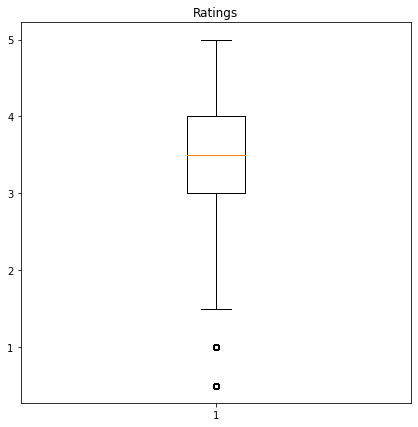

Comment: While there are a few movie with exceptionally low ratings, this is a subjective topic
 so we accept that some movies are going to have very low ratings.


In [50]:
# outliers
fig, axs = plt.subplots(figsize=(7,7))

axs.boxplot(movies.rating)
axs.set_title('Ratings')
plt.show()
print('Comment: While there are a few movie with exceptionally low ratings, this is a subjective topic\n so we accept that some movies are going to have very low ratings.')

---
<b> c. Outliers? </b><br>
 
 * while there are a few movie with exceptionally low ratings, this is a subjective topic so we accept that some movies are going to have very low ratings.
 
<b> d. Are those mistakes? </b> <br>
* There were mistakes in the items file, namely we found 7 tmdbId's that were incorrect and that prevented us from being able to pull genre data from the movie database, but since we weren't able to discover this until after we shaped the data and there were only 7 of them, we decided it was ok to just move forward without those pieces of information.


<b> e. How do you deal with these problems? </b><br>
    * comments made in-line above

---
## Data Understanding [20 points total]
### <span style='color:blue'>Section 2: Vizualization [10 points]</span>
1. Visualize the any important attributes appropriately.<br>
2. <span style='color:red'><b>Important: Provide an interpretation for any charts or graphs.</b></span>
---

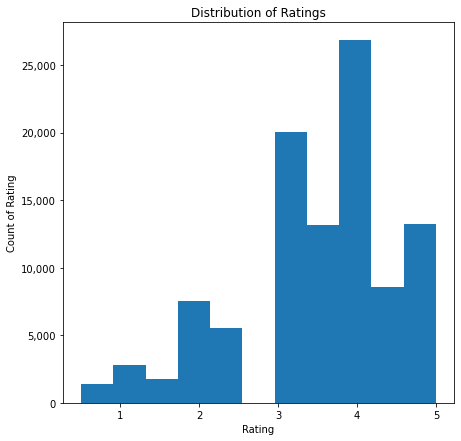

In [51]:
fig,ax = plt.subplots(figsize=(7,7))
ax.hist(ratings.rating, bins=11)
plt.xlabel('Rating')
plt.ylabel('Count of Rating')
plt.title('Distribution of Ratings')
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()


###### Distribution Comments
Using the distribution of movie ratings we can see that most movies have either a 4 or a 3 rating and very few have a less than a 2 rating.

In [52]:
movies.columns

Index(['userId', 'rating', 'tag', 'title', 'release_year', 'Action',
       'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Family', 'Fantasy', 'Film-Noir', 'History', 'Horror', 'IMAX',
       'Music', 'Mystery', 'Romance', 'Sci-Fi', 'TV Movie', 'Thriller', 'War',
       'Western', 'rating_year', 'rating_month', 'rating_day', 'rating_hour',
       'tag_year', 'tag_month', 'tag_day', 'tag_hour'],
      dtype='object')

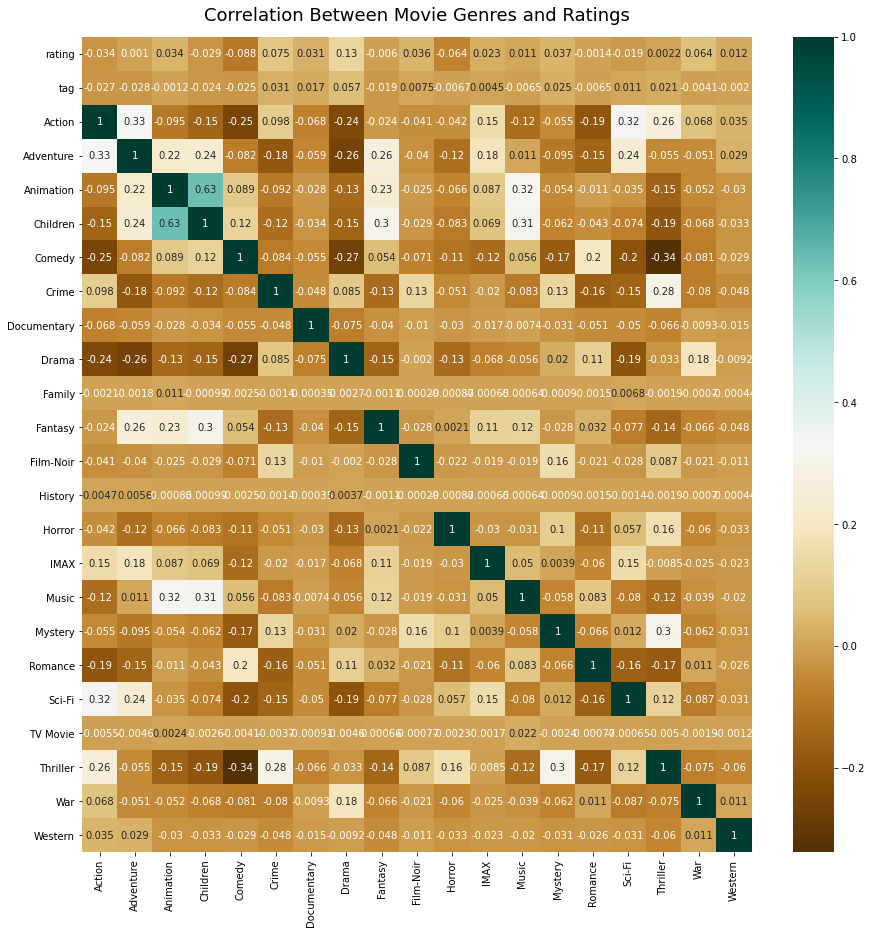

In [53]:
f, ax = plt.subplots(figsize=(15,15))
heatmap = sns.heatmap(movies.corr()[['Action',
       'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'IMAX', 'Music', 'Mystery',
       'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']], annot=True, cmap='BrBG')
heatmap.set_title('Correlation Between Movie Genres and Ratings', fontdict={'fontsize':18}, pad=16);
plt.show()

##### Correlation Heatmap Comments
From the correlatioin heatmap we can see that the only 2 genres that are highly correlated are Animation and Chilren, something to keep in mind as we are mining for association rules.

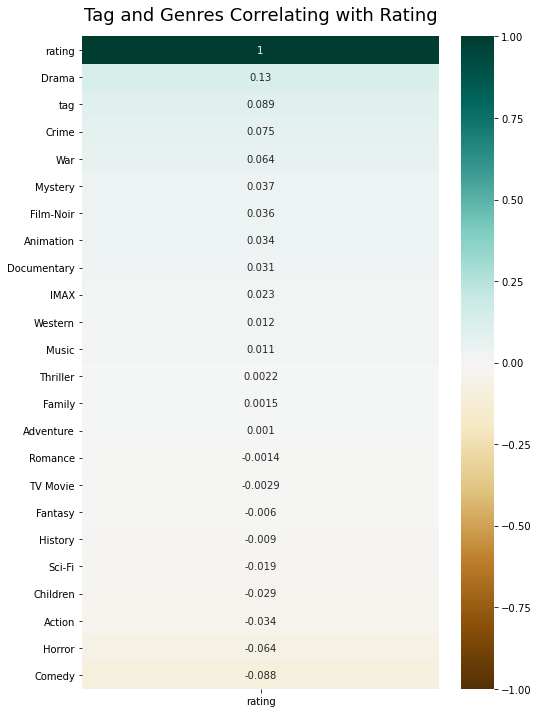

In [54]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(movies.corr()[['rating']].sort_values(by='rating', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Tag and Genres Correlating with Rating', fontdict={'fontsize':18}, pad=16);


##### Heatmap Comments
We see that Drama correlates the highest with rating, followed by Crime, War, Mystery, Film-Noir, Animation, Documentary, IMAX, Western, Musical, Thriller and Adventure while Romance, Fantasy, Sci-Fi, Children, Action, Horror and Comedy have negative correlation meaning that those genres tend to drive down a movie rating.
Since Adventure and Fantasy have such low correlation we consider they have very little impact on a movie's rating.

We can also see that having a tag isn't very highly correlated with a rating either.

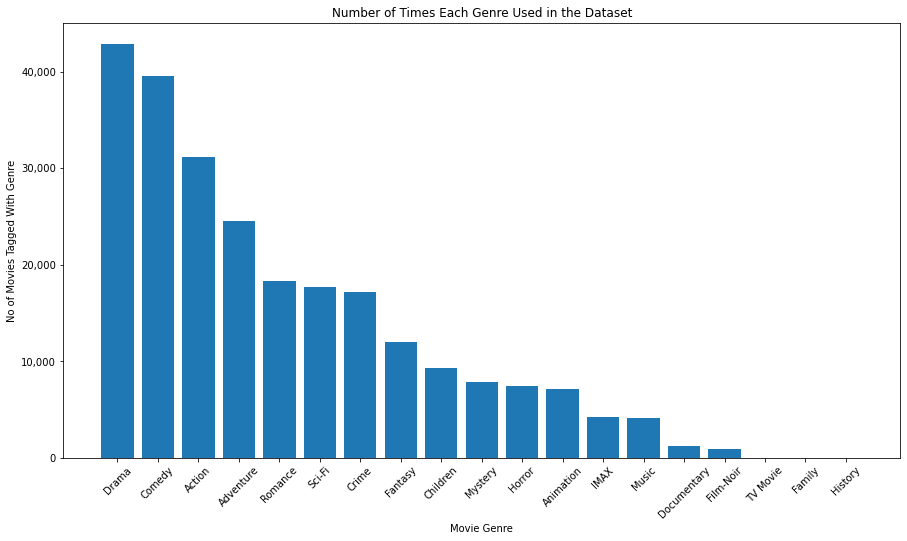

In [55]:
genre = ['Action',
       'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'IMAX', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
df = pd.DataFrame()
df['genre_tot'] = movies.iloc[:,5:24].sum(axis=0).astype('int')
df.reset_index(inplace=True)
df.rename(columns = {'index':'genre'}, inplace=True)
df.sort_values('genre_tot', ascending=False, inplace=True)

f, ax = plt.subplots(figsize=(15,8))
ax.bar(df.genre, df.genre_tot)
plt.xlabel('Movie Genre')
plt.xticks(rotation=45)
plt.ylabel('No of Movies Tagged With Genre')
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.title('Number of Times Each Genre Used in the Dataset')

plt.show()

###### Genre Usage Comments
Drama, Comedy, Action, Adventure and Romance are the 5 most used genre titles in the dataset while Documentary, Film-Noir, TV Movie, Family and History are the least used. This will more than likely come into play when determining which rules are the most important since the anything that is used less should present an interesting observation if it shows up as being more important.

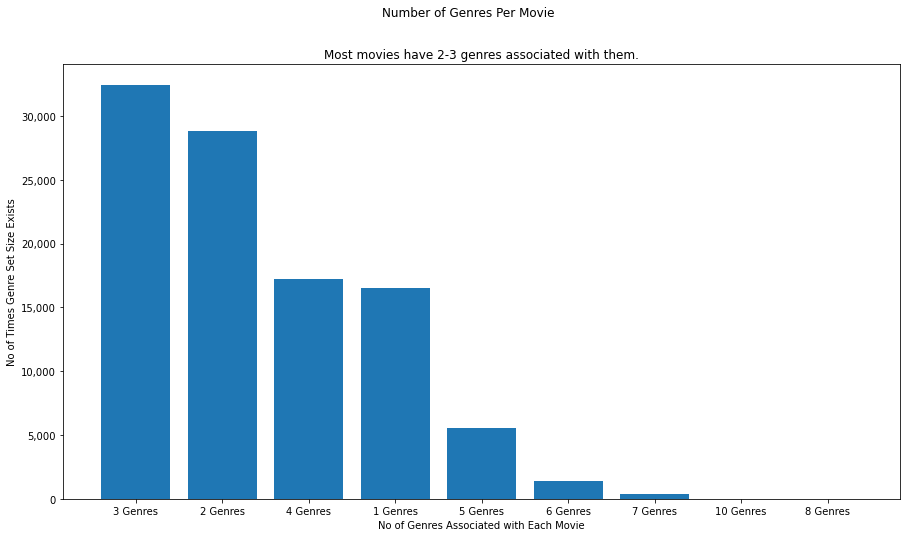

In [56]:
# let's get the combinations of genres by row to get a sense of what we should be looking for in the association rules mining
genre_combo = pd.DataFrame(movies.iloc[:,5:27].sum(axis=1).value_counts())
genre_combo.reset_index(inplace=True)
genre_combo.columns=['genre_combo','no_of_combos']
genre_combo.genre_combo = genre_combo.genre_combo.astype('str').str.slice(stop=-2) + ' Genres'
genre_combo.sort_values('no_of_combos', ascending=False, inplace=True)

f, ax = plt.subplots(figsize=(15,8))
ax.bar(genre_combo.genre_combo, genre_combo.no_of_combos)
plt.xlabel('No of Genres Associated with Each Movie')
plt.ylabel('No of Times Genre Set Size Exists')
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.suptitle('Number of Genres Per Movie')
plt.title('Most movies have 2-3 genres associated with them.')

plt.show()
#print(genre_combo)
#print(movies.iloc[:,5:27].columns) making sure we captured all the movie genres

##### Genres by Movie
This should help us determine which association rules are important because we we can see most movies have 2-3 genres associated with them, further with the chart above we can expect those genres to be Drama, Comedy, Action, Thriller. If we get some different results that may be something interesting


In [57]:
movies.columns

Index(['userId', 'rating', 'tag', 'title', 'release_year', 'Action',
       'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Family', 'Fantasy', 'Film-Noir', 'History', 'Horror', 'IMAX',
       'Music', 'Mystery', 'Romance', 'Sci-Fi', 'TV Movie', 'Thriller', 'War',
       'Western', 'rating_year', 'rating_month', 'rating_day', 'rating_hour',
       'tag_year', 'tag_month', 'tag_day', 'tag_hour'],
      dtype='object')

In [58]:
# flatten out the movies df
movies.rating = movies.rating.astype('category')
movie_dum = pd.get_dummies(movies[['rating', 'tag']])

movies2=movies[['Action',
       'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'IMAX', 'Music', 'Mystery',
       'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']]
movies2 = movies2.join(movie_dum)
movies2

,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,...,rating_0.5,rating_1.0,rating_1.5,rating_2.0,rating_2.5,rating_3.0,rating_3.5,rating_4.0,rating_4.5,rating_5.0
0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,1,0,0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102398,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
102399,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
102400,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
102401,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1


In [59]:
movies3 = copy.deepcopy(movies2).astype('bool')
movies3

,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,...,rating_0.5,rating_1.0,rating_1.5,rating_2.0,rating_2.5,rating_3.0,rating_3.5,rating_4.0,rating_4.5,rating_5.0
0,False,True,True,True,True,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,True,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102398,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
102399,True,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
102400,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
102401,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


---
# Modeling & Evaluation [50 points total]
Different tasks will require different evaluation methods. Be as thorough as possible when analyzing the data you have chosen and use visualizations of the results to explain the performance and expected outcomes whenever possible. Guide the reader through your analysis with plenty of discussion of the results. Each option is broken down by:


## <span style='color:blue'>M&E Section 1: Train & Adjust Parameters [10 points]</span>
---

In [60]:
# get rpy2 set up
from rpy2.robjects.packages import importr
from rpy2 import robjects as ro
from rpy2.robjects import r, pandas2ri
from rpy2.robjects.conversion import localconverter
pandas2ri.activate()

# so we can write r code using %R
%load_ext rpy2.ipython

C:\Users\justi\.conda\envs\lab3\lib\site-packages\rpy2\robjects\packages.py:366: UserWarning: The symbol 'quartz' is not in this R namespace/package.
  warnings.warn(


In [61]:
#%R install.packages('magrittr', dependencies=TRUE)
#%R install.packages('arulesViz', dpeendencies=TRUE)

In [62]:
%R .libPaths()

'C:/Users/justi/.conda/...,'C:/Program Files/R/R-4...


In [63]:
lib_loc = 'C:/Users/justi/.conda/envs/lab3/Lib/R/library'  # R library location



# import R packages
arules = importr('arules', lib_loc=lib_loc)
arules_viz = importr('arulesViz', lib_loc=lib_loc)

# get quality from itsets by using itsets.slots['quality']

In [64]:
with localconverter(ro.default_converter + pandas2ri.converter):
     rmovies = ro.conversion.py2rpy(movies3)

rmovies

Action,Adventure,Animation,...,rating_4.0,rating_4.5,rating_5.0
0,1,1,...,1,0,0
0,0,0,,1,0,0
1,0,0,,1,0,0
0,0,0,,0,0,1
...,...,...,,...,...,...
1,0,0,,0,0,1
0,0,0,,0,0,1
1,0,0,,0,0,1
1,0,0,,0,0,0


In [65]:
%R -i rmovies
# convert to transaction data
%R trans = as(rmovies, 'transactions')


<rpy2.robjects.methods.RS4 object at 0x000001C3F8D95A40> [RTYPES.S4SXP]
R classes: ('transactions',)

##### Find Frequent Itemsets

In [85]:
# run apriori and find some frequent itemsets
# default values: support = 0.1, min conf = 0.8, maxlen = 10, maxtime = 5 seconds
%R itsets <- apriori(trans, parameter = list(supp=0.001, minlen = 4,target='frequent itemsets'))


Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
         NA    0.1    1 none FALSE            TRUE       5   0.001      4
 maxlen            target  ext
     10 frequent itemsets TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 102 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[30 item(s), 102403 transaction(s)] done [0.03s].
sorting and recoding items ... [30 item(s)] done [0.00s].
creating transaction tree ... done [0.04s].
checking subsets of size 1 2 3 4 5 6 7 done [0.01s].
sorting transactions ... done [0.02s].
writing ... [925 set(s)] done [0.00s].
creating S4 object  ... done [0.01s].


<rpy2.robjects.methods.RS4 object at 0x000001C3EE2BB240> [RTYPES.S4SXP]
R classes: ('itemsets',)

In [86]:
# print out the frequent itemsets
%R itsets = sort(itsets, by='support')
%R inspect(head(itsets, n=10))
%R length(itsets)

     items                                  support    transIdenticalToItemsets
[1]  {Adventure,Animation,Children,Comedy}  0.02292902 0.000000000             
[2]  {Action,Adventure,Sci-Fi,Thriller}     0.01980411 0.000000000             
[3]  {Action,Crime,Drama,Thriller}          0.01762644 0.000000000             
[4]  {Action,Adventure,Sci-Fi,rating_4.0}   0.01543900 0.005761550             
[5]  {Adventure,Animation,Children,Fantasy} 0.01413045 0.000000000             
[6]  {Adventure,Children,Comedy,Fantasy}    0.01394490 0.000000000             
[7]  {Action,Adventure,Thriller,rating_4.0} 0.01309532 0.003740125             
[8]  {Action,Sci-Fi,Thriller,rating_4.0}    0.01236292 0.002900306             
[9]  {Crime,Drama,Thriller,rating_4.0}      0.01189418 0.003408103             
[10] {Action,Adventure,Thriller,rating_3.0} 0.01162075 0.004052616             
     count
[1]  2348 
[2]  2028 
[3]  1805 
[4]  1581 
[5]  1447 
[6]  1428 
[7]  1341 
[8]  1266 
[9]  1218 
[10] 1190 

array([925], dtype=int32)

##### get maximals

In [87]:
#%R -i itsets_df

%R is_max <- itsets[is.maximal(itsets)]
%R inspect(head(sort(is_max, by='support')))
%R length(is_max)

    items                                         support    
[1] {Comedy,Drama,Romance,rating_3.5}             0.005693193
[2] {Action,Adventure,Sci-Fi,Thriller,rating_4.0} 0.005507651
[3] {Action,Crime,Drama,Thriller,rating_4.0}      0.004404168
[4] {Action,Adventure,Sci-Fi,Thriller,rating_3.0} 0.003964728
[5] {Comedy,Drama,Romance,rating_4.5}             0.003574114
[6] {Action,Horror,Sci-Fi,Thriller}               0.003554583
    transIdenticalToItemsets count
[1] 0.004120973              583  
[2] 0.004033085              564  
[3] 0.002587815              451  
[4] 0.003017490              406  
[5] 0.002382743              366  
[6] 0.000000000              364  


array([369], dtype=int32)

##### Mine Association Rules

In [69]:
# mine for association rules
%R rules = apriori(rmovies, parameter = list(supp=0.001, minlen= 2, conf=.5))

%R inspect(head(rules, n=10))

#print quality metrics
%R quality(head(rules))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.5    0.1    1 none FALSE            TRUE       5   0.001      2
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 102 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[30 item(s), 102403 transaction(s)] done [0.03s].
sorting and recoding items ... [30 item(s)] done [0.00s].
creating transaction tree ... done [0.04s].
checking subsets of size 1 2 3 4 5 6 7 done [0.01s].
writing ... [1730 rule(s)] done [0.00s].
creating S4 object  ... done [0.01s].
     lhs            rhs         support     confidence coverage    lift    
[1]  {Film-Noir} => {Mystery}   0.004492056 0.5245154  0.008564202 6.812779
[2]  {Film-Noir} => {Crime}     0.006064275 0.7080958  0.008564202 4.216254
[3]  {Film-Noir} => {Thriller}  0.005820142 0.679

,support,confidence,coverage,lift,count
1,0.004492,0.524515,0.008564,6.812779,460
2,0.006064,0.708096,0.008564,4.216254,621
3,0.005820,0.679590,0.008564,2.565604,596
4,0.018095,0.575109,0.031464,1.373274,1853
5,0.039569,0.823912,0.048026,1.967380,4052
6,0.021308,0.523638,0.040692,5.783231,2182


In [70]:
# sort rules and print other interest metrics
%R rules = sort(rules, by='lift')
%R inspect(head(rules, n=10))


     lhs                                          rhs     support    
[1]  {Animation,IMAX,Romance}                  => {Music} 0.001660108
[2]  {Children,IMAX,Romance}                   => {Music} 0.001660108
[3]  {Animation,Children,IMAX,Romance}         => {Music} 0.001660108
[4]  {Animation,Fantasy,IMAX,Romance}          => {Music} 0.001660108
[5]  {Adventure,Animation,Drama,IMAX}          => {Music} 0.001699169
[6]  {Children,Fantasy,IMAX,Romance}           => {Music} 0.001660108
[7]  {Animation,Children,Fantasy,IMAX,Romance} => {Music} 0.001660108
[8]  {Adventure,Animation,Children,Drama,IMAX} => {Music} 0.001699169
[9]  {Animation,Children,Drama,IMAX}           => {Music} 0.001699169
[10] {Animation,Children,Drama,Romance}        => {Music} 0.001562454
     confidence coverage    lift     count
[1]  1.0000000  0.001660108 24.57475 170  
[2]  1.0000000  0.001660108 24.57475 170  
[3]  1.0000000  0.001660108 24.57475 170  
[4]  1.0000000  0.001660108 24.57475 170  
[5]  1.0000000 

,lhs,,rhs,support,confidence,coverage,lift,count
[1],"{Animation,IMAX,Romance}",=>,{Music},0.001660,1.000000,0.001660,24.574754,170
[2],"{Children,IMAX,Romance}",=>,{Music},0.001660,1.000000,0.001660,24.574754,170
[3],"{Animation,Children,IMAX,Romance}",=>,{Music},0.001660,1.000000,0.001660,24.574754,170
[4],"{Animation,Fantasy,IMAX,Romance}",=>,{Music},0.001660,1.000000,0.001660,24.574754,170
[5],"{Adventure,Animation,Drama,IMAX}",=>,{Music},0.001699,1.000000,0.001699,24.574754,174
[6],"{Children,Fantasy,IMAX,Romance}",=>,{Music},0.001660,1.000000,0.001660,24.574754,170
[7],"{Animation,Children,Fantasy,IMAX,Romance}",=>,{Music},0.001660,1.000000,0.001660,24.574754,170
[8],"{Adventure,Animation,Children,Drama,IMAX}",=>,{Music},0.001699,1.000000,0.001699,24.574754,174
[9],"{Animation,Children,Drama,IMAX}",=>,{Music},0.001699,0.988636,0.001719,24.295495,174
[10],"{Animation,Children,Drama,Romance}",=>,{Music},0.001562,0.987654,0.001582,24.271362,160


In [71]:
%R interestMeasure(rules, trans=trans)

,support,confidence,lift,count,coverage,rhsSupport,leverage,hyperLift,hyperConfidence,fishersExactTest,...,leastContradiction,centeredConfidence,varyingLiaison,yuleQ,yuleY,lerman,implicationIndex,importance,stdLift,boost
1,0.001660,1.000000,24.574754,170,0.001660,0.040692,0.001593,12.142857,1.000000,1.445169e-238,...,0.040797,0.959308,23.574754,NaN,NaN,62.005047,-12.770369,1.405224,1.000000,1.632768
2,0.001660,1.000000,24.574754,170,0.001660,0.040692,0.001593,12.142857,1.000000,1.445169e-238,...,0.040797,0.959308,23.574754,NaN,NaN,62.005047,-12.770369,1.405224,1.000000,1.632768
3,0.001660,1.000000,24.574754,170,0.001660,0.040692,0.001593,12.142857,1.000000,1.445169e-238,...,0.040797,0.959308,23.574754,NaN,NaN,62.005047,-12.770369,1.405224,1.000000,1.000000
4,0.001660,1.000000,24.574754,170,0.001660,0.040692,0.001593,12.142857,1.000000,1.445169e-238,...,0.040797,0.959308,23.574754,NaN,NaN,62.005047,-12.770369,1.405224,1.000000,1.000000
5,0.001699,1.000000,24.574754,174,0.001699,0.040692,0.001630,12.428571,1.000000,3.371819e-244,...,0.041757,0.959308,23.574754,NaN,NaN,62.730277,-12.919735,1.405700,1.000000,1.051724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1726,0.006084,0.514876,1.229447,623,0.011816,0.418787,0.001135,1.138940,1.000000,8.054639e-12,...,0.014527,0.096089,0.229447,0.193528,0.097688,5.165022,-4.384304,0.090881,0.029752,inf
1727,0.002100,0.513126,1.225270,215,0.004092,0.418787,0.000386,1.080402,0.999940,5.993054e-05,...,0.005013,0.094340,0.225270,0.188647,0.095178,2.984051,-2.532997,0.088579,0.026253,0.875870
1728,0.086023,0.512211,1.223083,8809,0.167944,0.418787,0.015690,1.200136,1.000000,1.400280e-161,...,0.205410,0.093424,0.223083,0.223470,0.113166,18.932232,-16.070536,0.107461,0.024421,inf
1729,0.001904,0.510471,1.218929,195,0.003730,0.418787,0.000342,1.071429,0.999817,1.829930e-04,...,0.004547,0.091685,0.218929,0.183429,0.092499,2.769057,-2.350501,0.086287,0.020942,0.996604


---
## <span style='color:blue'> M&E Section 2: Evaluate & Compare [10 points]</span>
- <b>Evaluate:</b> Use correct method for the model - Accuracy, Precision/Recall/ F-measure/ RMSE, MSE, AUC, RUC 
- <b>Compare:</b> Use statistical analysis that can be found at the bottom of Week 6 IPYNB
    - Example from Lab 2:
        > <span style='color:green'><b>from</b></span> sklearn.model_selection <span style='color:green'><b>import</b></span> cross_val_score<br>
        > #Q: Is clf1 better or worse than clf2? <br>
        > cv=StratifiedKFold(n_splits=10)<br>
        > acc1 = cross_val_score(clf1, X, y=y, cv=cv)<br>
        > acc2 = cross_val_score(clf2, X, y=y, cv=cv)<br>
        > acc1, acc2<br><br>
        <br>
        > t = scipy.stats.t.ppf(q=1-0.05/2,df=9)/ np.sqrt(10)
        > t = t / np.sqrt(10)<br>
        > e = (1-acc1)-(1-acc2)<br>
        > stdtot = np.std(e)<br>
        > dbar = np.mean(e)<br>
        > print ('Confidence Interval: %f, %f' <span style='color:blue'>%</span> (dbar - t * stdtot, dbar + t * stdtot) )\<br>
        > print ('Based on 95% CI, we fail or not to reject the null hypothesis that model 1 is different (or not) than model 2')<br>

---

---
## <span style='color:blue'>M&E Section 3: Visualize Results [10 points]</span>


---

In [72]:
#  Ebnable HTML/CSS 
from IPython.core.display import HTML
HTML("<link href='https://fonts.googleapis.com/css?family=Passion+One' rel='stylesheet' type='text/css'><style>div.attn { font-family: 'Helvetica Neue'; font-size: 30px; line-height: 40px; color: #FFFFFF; text-align: center; margin: 30px 0; border-width: 10px 0; border-style: solid; border-color: #5AAAAA; padding: 30px 0; background-color: #DDDDFF; }hr { border: 0; background-color: #ffffff; border-top: 1px solid black; }hr.major { border-top: 10px solid #5AAA5A; }hr.minor { border: none; background-color: #ffffff; border-top: 5px dotted #CC3333; }div.bubble { width: 65%; padding: 20px; background: #DDDDDD; border-radius: 15px; margin: 0 auto; font-style: italic; color: #f00; }em { color: #AAA; }div.c1{visibility:hidden;margin:0;height:0;}div.note{color:red;}</style>")

In [76]:
# Visualize different rules
%R library(arulesViz)
%R plot(rules)

R[write to console]: To reduce overplotting, jitter is added! Use jitter = 0 to prevent jitter.



<rpy2.robjects.vectors.ListVector object at 0x000001C3EAFE9B00> [RTYPES.VECSXP]
R classes: ('gg', 'ggplot')
[ListSexpV..., ListSexpV..., SexpEnvir..., ListSexpV..., ..., SexpEnvir..., SexpEnvir..., SexpEnvir..., ListSexpV...]
  data: <class 'rpy2.rinterface.ListSexpVector'>
  <rpy2.rinterface.ListSexpVector object at 0x000001C3EAFE9B40> [RTYPES.VECSXP]
  layers: <class 'rpy2.rinterface.ListSexpVector'>
  <rpy2.rinterface.ListSexpVector object at 0x000001C3EF0F9B80> [RTYPES.VECSXP]
  scales: <class 'rpy2.rinterface_lib.sexp.SexpEnvironment'>
  <rpy2.rinterface_lib.sexp.SexpEnvironment object at 0x000001C3EDFF4BC0> [RTYPES.ENVSXP]
  mapping: <class 'rpy2.rinterface.ListSexpVector'>
  <rpy2.rinterface.ListSexpVector object at 0x000001C3EF0F95C0> [RTYPES.VECSXP]
  theme: <class 'rpy2.rinterface.ListSexpVector'>
  <rpy2.rinterface.ListSexpVector object at 0x000001C3EAA0C300> [RTYPES.VECSXP]
  coordinates: <class 'rpy2.rinterface_lib.sexp.SexpEnvironment'>
  <rpy2.rinterface_lib.sexp.SexpEnvironment object at 0x000001C3EAA0C840> [RTYPES.ENVSXP]
  facet: <class 'rpy2.rinterface_lib.sexp.SexpEnvironment'>
  <rpy2.rinterface_lib.sexp.SexpEnvironment object at 0x000001C3EF0F9BC0> [RTYPES.ENVSXP]
  plot_env: <class 'rpy2.rinterface_lib.sexp.SexpEnvironment'>
  <rpy2.rinterface_lib.sexp.SexpEnvironment object at 0x000001C3EAA0CCC0> [RTYPES.ENVSXP]
  labels: <class 'rpy2.rinterface.ListSexpVector'>
  <rpy2.rinterface.ListSexpVector object at 0x000001C3EA4ACC40> [RTYPES.VECSXP]

---
## <span style='color:blue'>M&E Section 4: Summarize the Ramifications [20 points]</span>
---

##### Option B: Association Rule Mining
- Train: Create frequent itemsets and association rules (adjust parameters).
- Eval: Use several measures for evaluating how interesting different rules are.
- Visualize: Use tables/visualization to discuss the found results.
- Summarize: Describe your results. What findings are the most compelling and why?
<br>


---
## <span style='color:blue'>Deployment [10 points total]</span>
Be critical of your performance and tell the reader how you current model might be usable by other parties.<br>
- Did you achieve your goals? If not, can you reign in the utility of your modeling?<br><br>
- How useful is your model for interested parties (i.e., the companies or organizations that might want to use it)?<br>
In the movies world, if you are a studio and looking where to invest your money for the best return on investment using association rules mining can help to show which genres perform the best in terms of ratings or in terms of ROI in budget vs bo office gross. For example: Drama, Comedy, Action, Adventure and Romance are the 5 most used genre titles in the dataset while Documentary, Film-Noir, TV Movie, Family and History are the least used. We also know from our EDA that most often 3 or 2 genres are used to describe a movie...in our association rules mining we discover that the most interesting combinations are
{list top 10}
From this intelligence we can recommend to a studio that these are the most interesting combinations
- How would you deploy your model for interested parties?<br>
- What other data should be collected?<br>
- How often would the model need to be updated, etc.?<br>

---

---
## <span style='color:blue'>Exceptional Work [10 points total]</span>
You have free reign to provide additional analyses or combine analyses.

---